In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly

In [2]:
combined_data = pd.read_csv("/Users/briankimanzi/Documents/python /M-pesa spending prediction app/DataSet/Mpesa_cleaned_data.csv")
combined_data

,Receipt,transaction_Day,Year,Month,Date,Weekday,Hour,Minute,Seconds,Transaction_type,Transaction_party,Transaction_amount,paid_in_or_Withdraw,Balance
0,TC17XS3U67,49,2025,3,1,5,15,55,18,SEND MONEY,GIDEON KIPAMET KAIYIAN,0.0,PAID IN,27.00
1,TC14XHM64C,49,2025,3,1,5,14,49,55,M-SHWARI DEPOSIT FROM M-PESA,M-SHWARI,0.0,PAID IN,107.00
2,TC11XF54B3,49,2025,3,1,5,14,34,40,RECEIVED FUNDS,SHEILA MERCY NDUSYA,1100.0,PAID IN,1107.00
3,TC13WSE6N5,49,2025,3,1,5,12,11,53,PAY BILL,TINGG,0.0,PAID IN,7.00
4,TBS1THWSOL,48,2025,2,28,4,17,50,41,SEND MONEY,NAOMI NYAMBURA MBURU,0.0,PAID IN,17.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,SJ49WDO7A3,1,2024,10,4,4,18,38,59,BUY GOODS,JACKSON MWAURA MUGURO,50.0,WITHDRAW,2330.81
1483,SJ49WC912X,1,2024,10,4,4,18,31,59,BUY GOODS,BK 911 CHICKEN,170.0,WITHDRAW,2380.81
1484,SJ41W9ZSH5,1,2024,10,4,4,18,22,0,BUY GOODS,JUDITH KATHURE MWITI,130.0,WITHDRAW,2550.81
1485,SJ40V94Q5K,1,2024,10,4,4,14,35,59,POCHI LA BIASHARA,MADERINA NYOROKA,50.0,WITHDRAW,2680.81


# <i>Extrapolatory Data Analysis</i>
* <h3>Finding insight and correlation on dataset by answering the following question</h3>

- What day of the week do I spend the most money?  
- How does spending vary across different months or years?
- At what time of day do most transactions happen?
- Is there a particular week or date where spending spikes?

<h3> Spending Patterns</h3>

- Which transaction types (e.g., Buy Goods, PayBill, Withdraw) do I use most?
- What’s the average transaction amount by type?
- Are there more cash-ins (Received) or cash-outs (Withdrawals)?

<h3>  People or Places You Transact With</h3>

- Which parties do I send/receive money to/from the most?
- Who do I spend the most money on?

<h3> Balance & Financial </h3>

- What’s my balance trend over time?
- Do larger transactions lead to lower account balances?

In [4]:
Rows, Columns = combined_data.shape
print(f"Rows: {Rows} Columns: {Columns}")

Rows: 1487 Columns: 14


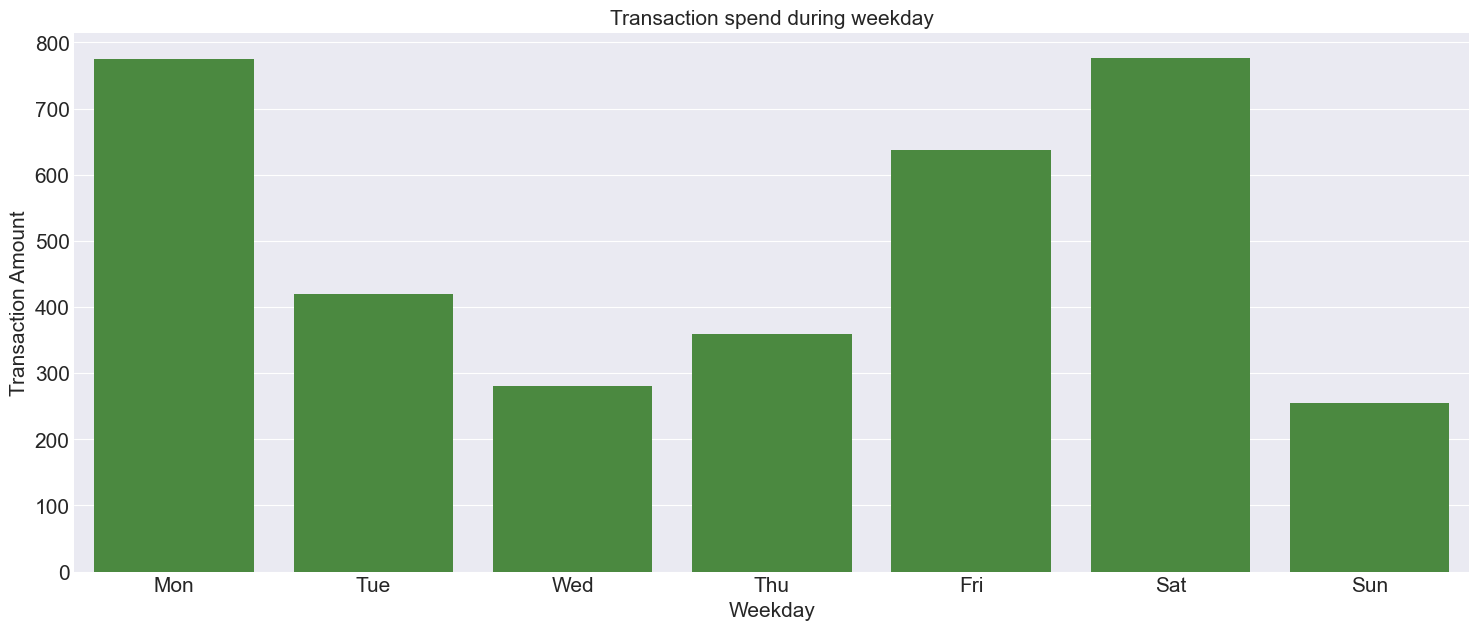

In [9]:
# What day of the week do I spend the most money?
# mpesa color code #439534
plt.figure(figsize=(18, 7))
plt.style.use('seaborn-v0_8-darkgrid')
plot = sns.barplot(data=combined_data,
            x='Weekday',  y='Transaction_amount', color='#439534', errorbar=None,
           )
plt.title('Transaction spend during weekday', fontsize=15)
plt.xlabel('Weekday', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Transaction Amount', fontsize=15)
plt.yticks(fontsize=15)
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plot.set_xticklabels([weekday_names[i] for i in plot.get_xticks()])
plt.savefig("Charts/Transaction_spend_during_weekday.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

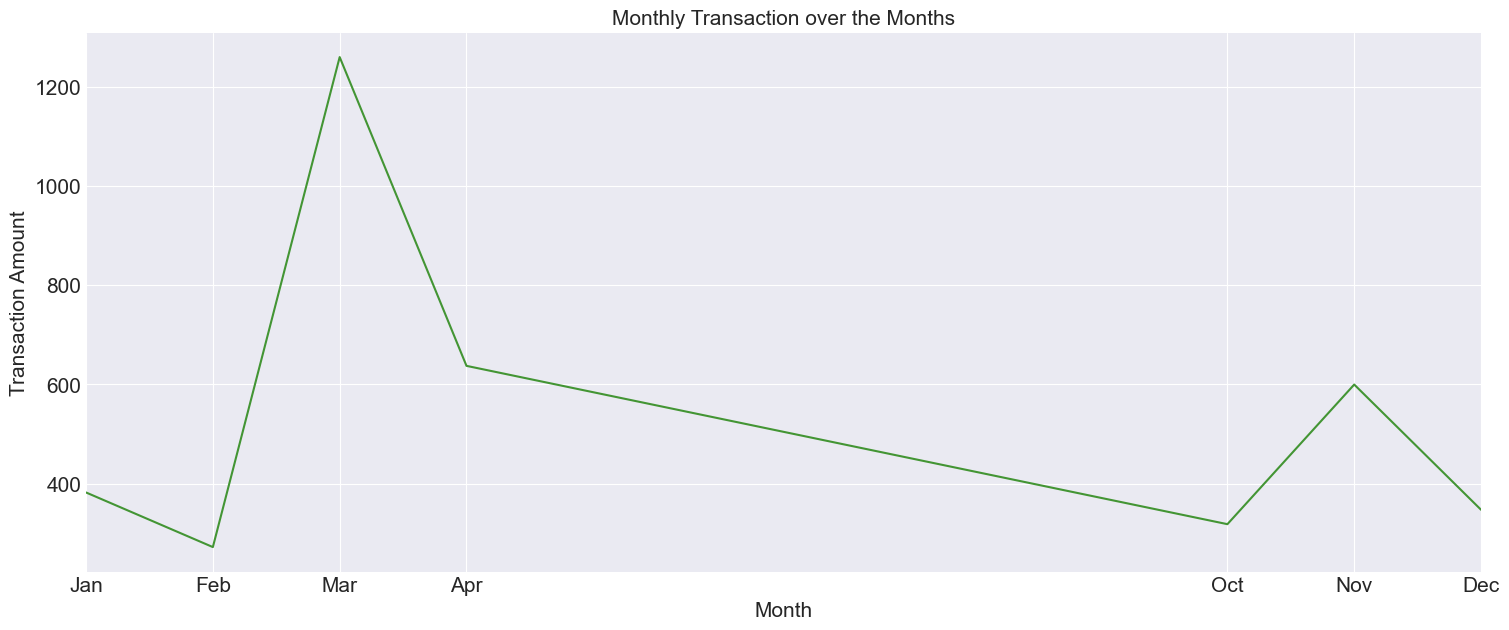

In [10]:
# How does spending vary across different months?
plt.figure(figsize=(18, 7))
plot = sns.lineplot(data=combined_data, x='Month', y='Transaction_amount', color='#439534', errorbar=None)
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
existing_months = sorted(combined_data['Month'].unique())
plot.set_xticks(existing_months)
plot.set_xticklabels([months_names[int(i)-1] for i in existing_months])
plot.set_xlim(1, 12)
plt.title("Monthly Transaction over the Months", fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Transaction Amount", fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Charts/Monthly_transaction_over_the_months.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

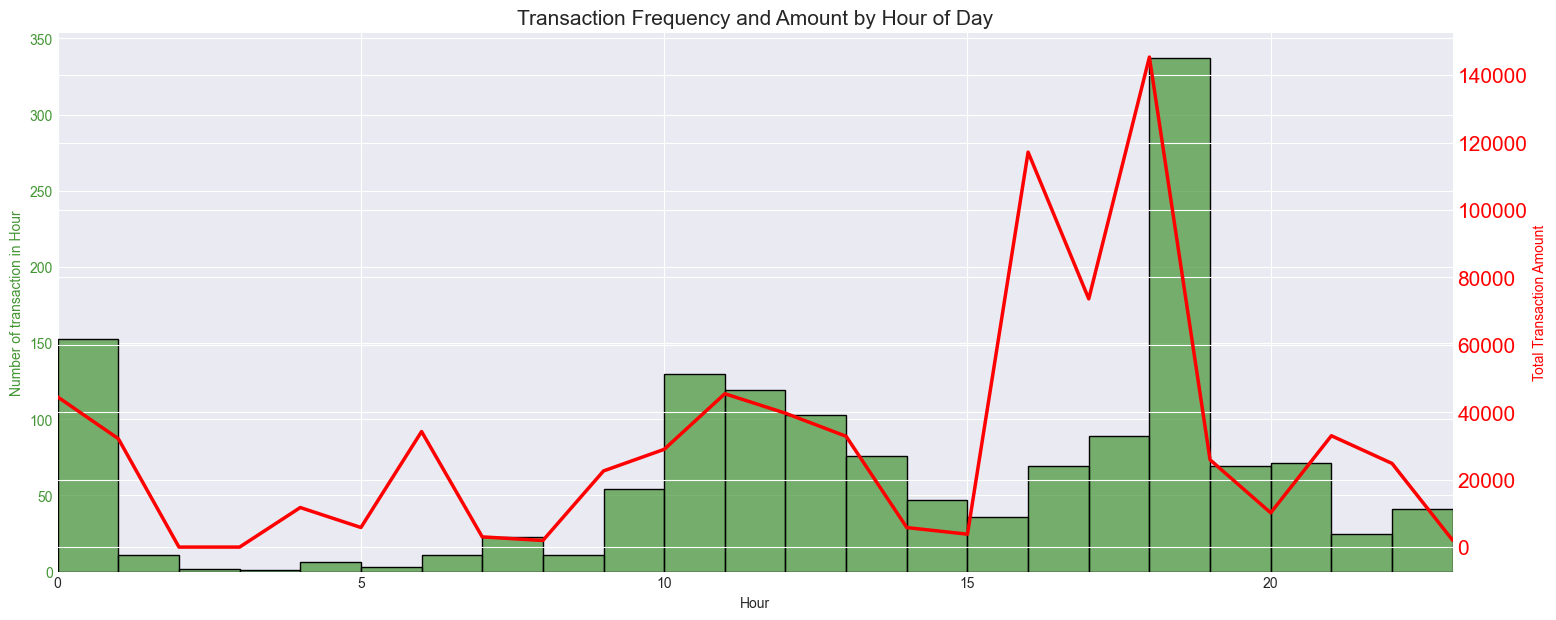

In [11]:
# At what time of day do most transactions happen?
fig, ax1 = plt.subplots(figsize=(18, 7))
sns.histplot(data=combined_data, x='Hour', color='#439534', binwidth=1, alpha=0.7, ax=ax1)
ax1.set_ylabel('Number of transaction in Hour', color='#439534')
ax1.tick_params(axis='y', labelcolor='#439534')
ax1.set_xlim(0, 23)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=combined_data.groupby('Hour')['Transaction_amount'].sum().reset_index(),x='Hour',y='Transaction_amount',
                   color='red',linewidth=2.5,ax=ax2
                  )
ax2.set_ylabel('Total Transaction Amount', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Transaction Frequency and Amount by Hour of Day', fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Hour", fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Charts/Transaction_frequency_and_amount_by_hour_of_day.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

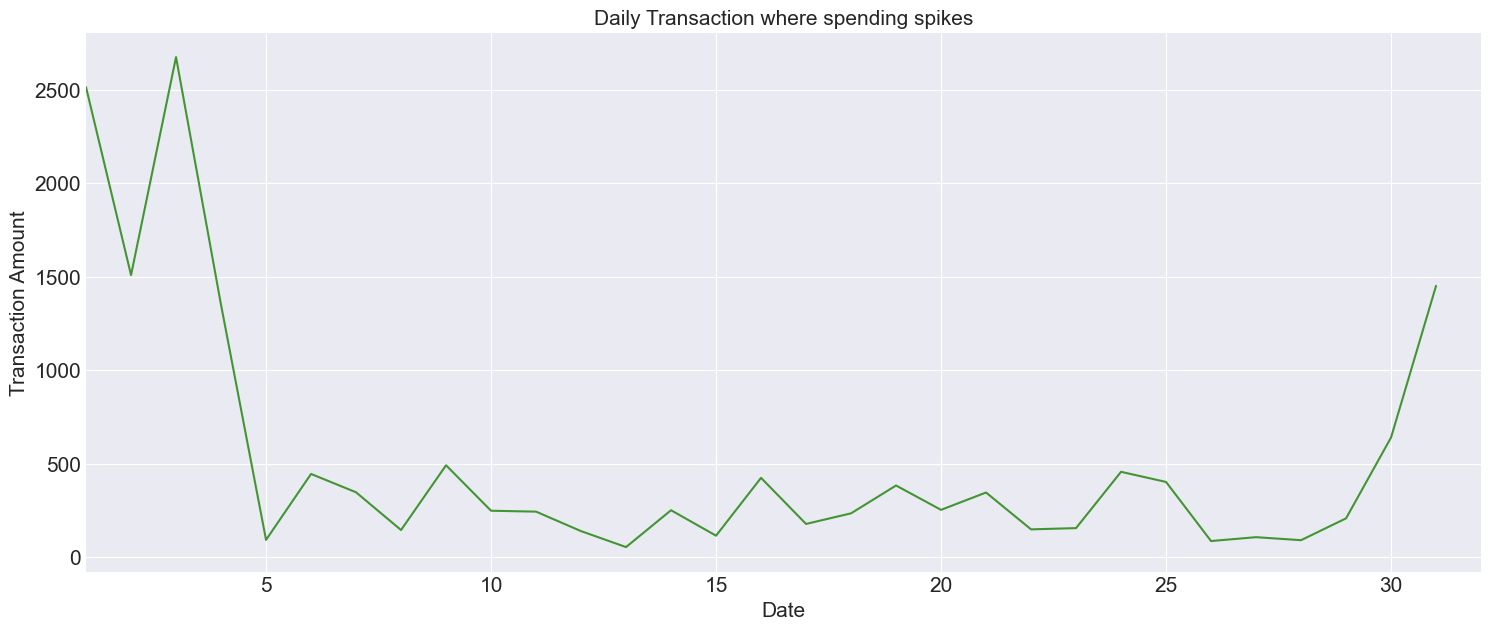

In [12]:
# Is there a particular date where spending spikes?
plt.figure(figsize=(18, 7))
plot = sns.lineplot(data=combined_data, x='Date', y='Transaction_amount', errorbar=None, color='#439534')
plot.set_xlim(1, 32)
plt.title("Daily Transaction where spending spikes", fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Transaction Amount", fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Charts/Daily_transction_where_spending_spikes.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

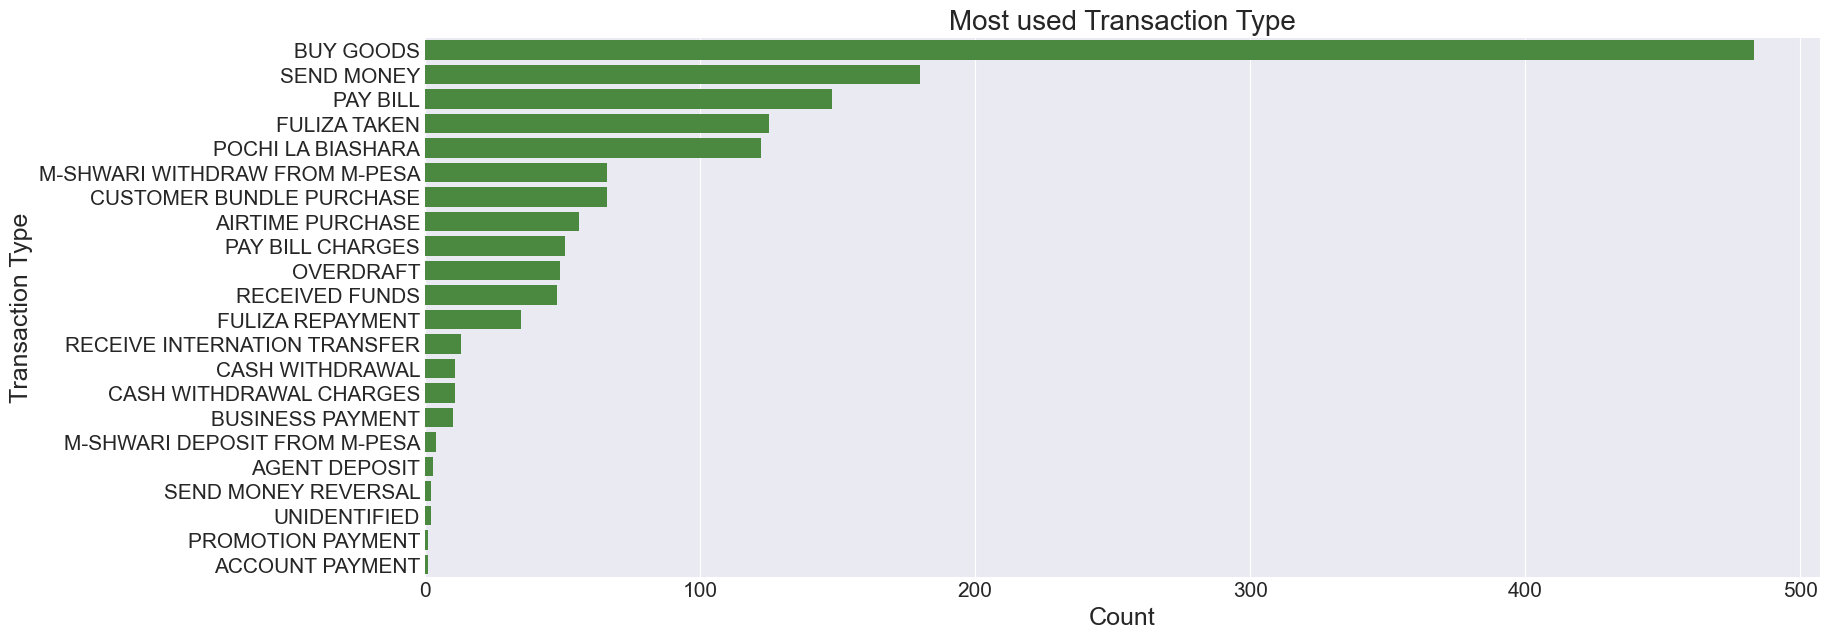

In [13]:
# Which transaction types do I use most?
plt.figure(figsize=(18, 7))
sort = combined_data.sort_values(by='Transaction_type',ascending=False)
sns.countplot(data=combined_data, y='Transaction_type', color='#439534',
             order=combined_data['Transaction_type'].value_counts().index)
plt.title('Most used Transaction Type', fontsize=20)
plt.xlabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Transaction Type', fontsize=18)
plt.yticks(fontsize=15)
plt.savefig("Charts/Most_used_transaction_type.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

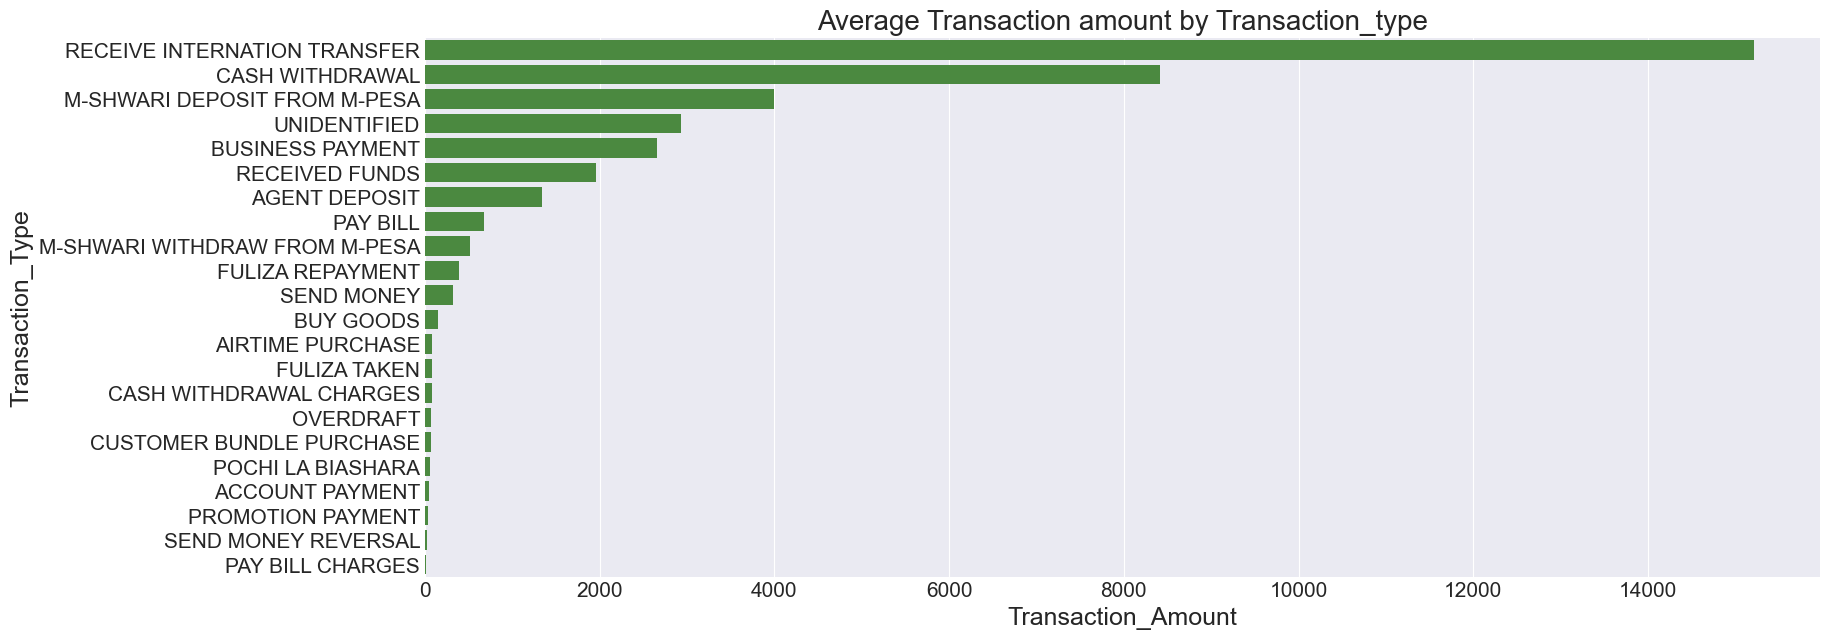

In [14]:
# What’s the average transaction amount by type?
Grouped_avg_type = (combined_data.groupby('Transaction_type')['Transaction_amount']
                    .mean().sort_values(ascending=False).reset_index())

plt.figure(figsize=(18, 7))
sns.barplot(data=Grouped_avg_type, y='Transaction_type', x='Transaction_amount', color='#439534')
plt.title('Average Transaction amount by Transaction_type', fontsize=20)
plt.xlabel('Transaction_Amount', fontsize=18)
plt.ylabel('Transaction_Type', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Charts/Average_transaction_amount_by_transaction_type.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# Are there more cash-ins (Paid In) or cash-outs (Withdrawals)?
paid_in = combined_data['paid_in_or_Withdraw'].value_counts()
plt.figure(figsize=(15, 7))
fig = go.Figure(go.Pie(labels=paid_in.index, values=paid_in.values, hole=.5, 
                      marker_colors = ['#439534', 'red'],
                      textinfo='percent+label',
                      hoverinfo='value'))
fig.update_layout(
    title_text='(Paid In) vs. (Withdraws)',
    title_x=0.5,  # Center title
    showlegend=False,  
    height=500,
)
fig.show()
fig.write_image("Charts/(Paid_in)vs(withdraws).png", scale=3)

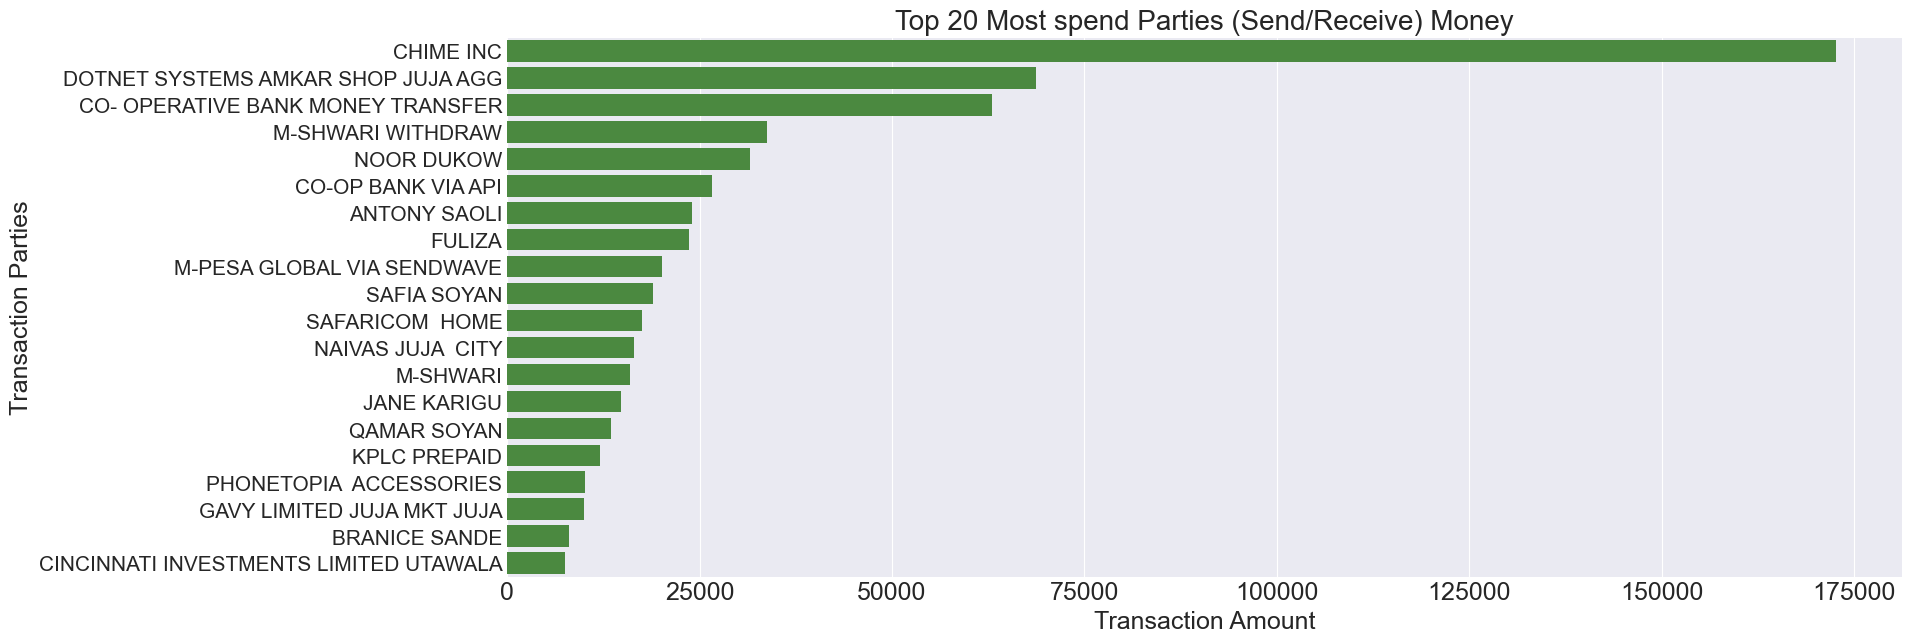

In [15]:
# Which parties do I send/receive money to/from the most?
plt.figure(figsize=(18,7))
top_Parties = (combined_data.groupby('Transaction_party')['Transaction_amount']
               .sum().sort_values(ascending=False).head(20).reset_index())
sns.barplot(data=top_Parties,
           x='Transaction_amount',
           y='Transaction_party',
           color='#439534')
plt.title('Top 20 Most spend Parties (Send/Receive) Money', fontsize=20)
plt.xlabel('Transaction Amount', fontsize=18)
plt.ylabel('Transaction Parties', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.savefig("Charts/Top20_most_spend_parties(send_receive)_money.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# Who do I spend the most money on
plt.figure(figsize=(18,7))
filtered = combined_data[combined_data["paid_in_or_Withdraw"] == "WITHDRAW"]
spend_most_money = (filtered.groupby("Transaction_party")["Transaction_amount"]
                    .sum().head(20).sort_values(ascending=False).reset_index())
sns.barplot(data=spend_most_money, x="Transaction_amount", y="Transaction_party", color="#439534")
plt.title("Top 20 spending under withdraw", fontsize=20)
plt.xlabel("Transaction_Amount", fontsize=18)
plt.ylabel("Transaction_Party", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Charts/top20_spending_under_withdraw.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# What’s my balance trend over time?
plt.figure(figsize=(18,7))
sns.lineplot(data=combined_data, x='Date', y='Balance', color="#439534", errorbar=None)
plt.title("My Balance Trend Over Time", fontsize=17)
plt.xlabel("Date", fontsize=17)
plt.ylabel("Balance", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1,32)
plt.savefig("Charts/My_balance_trend_over_time.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# Do larger transactions lead to lower account balances?
plt.figure(figsize=(18,7))
Low_balance = 100
big_transaction = combined_data['Transaction_amount'].quantile(.75)

sns.scatterplot(
    data=combined_data, x='Transaction_amount', y='Balance',
    hue = combined_data['Transaction_amount'] < Low_balance,
    palette={True: 'red', False: "#439534"},
    style=combined_data["Transaction_amount"] > big_transaction,
    markers={True: 'X', False: 'o'},
    size=combined_data['Transaction_amount'],
    sizes=(20, 200),
    alpha=0.9
    )
# Add reference lines
plt.axvline(big_transaction, color='blue', linestyle='--', label='Big Transaction Threshold')
plt.axhline(Low_balance, color='red', linestyle='--', label='Low Balance Threshold')

plt.title('Transaction Impact on Account Balance', fontsize=20)
plt.xlabel('Transaction Amount', fontsize=15)
plt.ylabel('Account Balance', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Risk Indicators', bbox_to_anchor=(1.05, 1), loc='upper left')

#  risk zones
plt.text(
    x=big_transaction*1.1, 
    y=Low_balance*0.5, 
    s='High Risk Zone', 
    color='red',
    fontsize=12,
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.savefig("Charts/Transaction_impact_on_account_balance.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()